In [1]:
# libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Global approach to image description

### A) 3-D histogram


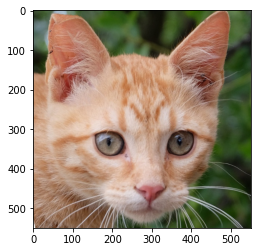

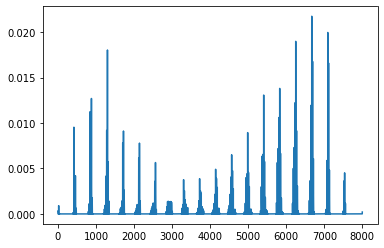

In [2]:
def myhist3(src, n_bins):
    H = np.zeros((n_bins, n_bins, n_bins), dtype=int) # 3D histogram
    bin_size = n_bins / 256
    reshaped_src = src.reshape((-1, 3))
    for pixel in reshaped_src:
        H[int(pixel[0] * bin_size), int(pixel[1] * bin_size), int(pixel[2] * bin_size)] += 1
    return H / np.sum(H) # normalize


I = cv2.imread("images/cat1.jpg")
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
plt.imshow(I)
plt.show()

# show cat's histogram
H = myhist3(I, 20)
plt.plot(H.reshape((-1)))
plt.show()

### B) Cmparing Histograms

In [3]:
def compare_histograms(h1, h2, method='euclidean'):
    if method == 'euclidean':
        return np.sqrt(np.sum(np.square(h1 - h2)))
    elif method == 'chi-square':
        return 0.5 * np.sum((np.square(h1 - h2)) / (h1 + h2 + 1 ** (-10)))
    elif method == 'intersection':
        return 1 - np.sum(np.minimum(h1, h2))
    elif method == 'hellinger':
        return np.sqrt(0.5 * np.sum(np.square(np.sqrt(h1) - np.sqrt(h2))))
    else:
        raise Exception('unimplemented method')

### C) Compare Images

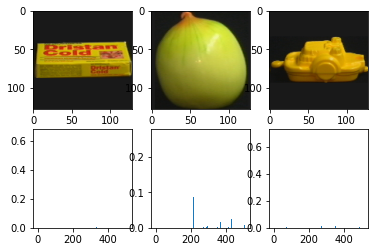

euclidean(H1,H1): 0.0
euclidean(H1,H2): 0.42630332471992644
euclidean(H1,H3): 0.09507866927455817
chi-square(H1,H1): 0.0
chi-square(H1,H2): 0.0544680098599646
chi-square(H1,H3): 0.0037749907788217794
intersection(H1,H1): 0.0
intersection(H1,H2): 0.6007080078125
intersection(H1,H3): 0.197021484375
hellinger(H1,H1): 0.0
hellinger(H1,H2): 0.5745452717010867
hellinger(H1,H3): 0.32069985954328856


In [4]:
# get input (reshaped histograms of given images
image_filenames = [f'dataset/object_0{i}_1.png' for i in range(1, 4)]
Is = [cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB) for filename in image_filenames]
n_bins = 8
Histograms = [myhist3(I, n_bins).reshape(-1) for I in Is]

for idx, I in enumerate(Is):
    plt.subplot(2, 3, idx + 1)
    plt.imshow(I)
    plt.subplot(2, 3, idx + 4)
    plt.bar(range(n_bins ** 3), Histograms[idx])
plt.show()

#Compute distance between H1 and given picture
for distance in ['euclidean', 'chi-square', 'intersection', 'hellinger']:
    for idx, H in enumerate(Histograms):
        print(f'{distance}(H1,H{idx + 1}): {compare_histograms(Histograms[0], H, method=distance)}')

**Question**: Which image (object_02_1.png or object_03_1.png) is more similar
to image object_01_1.png considering the L 2 distance? How about the other three
distances? We can see that all three histograms contain a strongly expressed com-
ponent (one bin has a much higher value than the others). Which color does this
bin represent?

Answer: H3 and black

### E) Plot distances

In exercise D

In [5]:
def plot_distances(distances):
    distances = list(distances)
    sorted_dist = sorted(distances)
    smallest_indices = np.argsort(distances)[:6]

    plt.subplot(1, 2, 1)
    plt.scatter(smallest_indices, [distances[i] for i in smallest_indices], color='orange')
    plt.plot(range(len(distances)), distances)

    plt.subplot(1, 2, 2)
    plt.scatter(range(6), sorted_dist[:6], color='orange')
    plt.plot(range(len(sorted_dist)), sorted_dist)
    plt.show()

## D) image retrieval and comparer


distance: euclidean
picture object_01_1.png
picture object_01_3.png
picture object_17_4.png
picture object_17_2.png
picture object_03_1.png
picture object_03_3.png


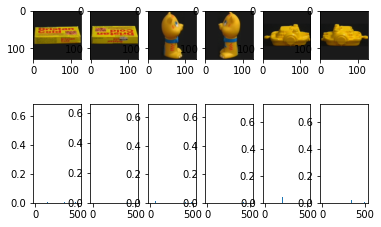

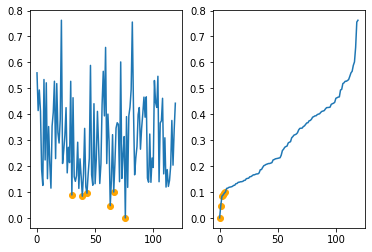

distance: chi-square
picture object_01_1.png
picture object_01_3.png
picture object_17_4.png
picture object_17_2.png
picture object_03_1.png
picture object_03_3.png


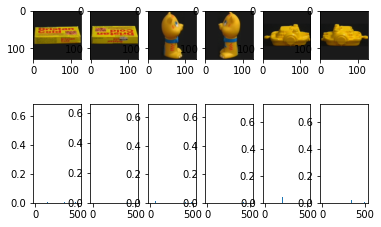

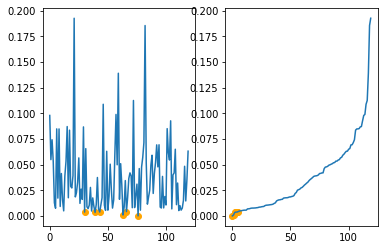

distance: intersection
picture object_01_1.png
picture object_01_3.png
picture object_03_1.png
picture object_17_4.png
picture object_17_2.png
picture object_03_3.png


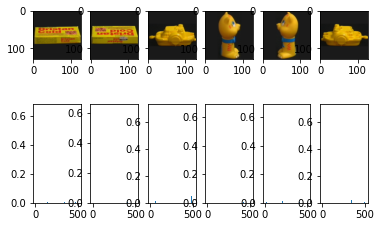

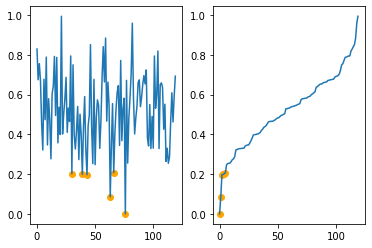

distance: hellinger
picture object_01_1.png
picture object_01_3.png
picture object_01_2.png
picture object_03_1.png
picture object_17_4.png
picture object_17_2.png


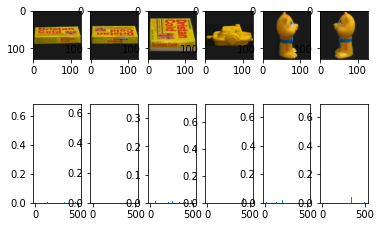

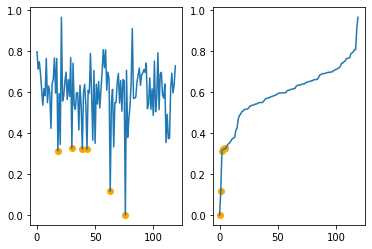

In [6]:
#Image retrieval

from os import listdir
from os.path import isfile, join

# get histogram from given folder in 1D lists
def get_histograms(dir_path, n_bins):
    files_paths = [file for file in listdir(dir_path) if
                   isfile(join(dir_path, file)) & (file[-4:] == '.png')]
    Is = [cv2.cvtColor(cv2.imread(join(dir_path, filename)), cv2.COLOR_BGR2RGB) for filename in files_paths]
    Hs = {path: myhist3(I, n_bins).reshape(-1) for I, path in zip(Is, files_paths)}
    return Hs

# get dataset histograms
dir_path = 'dataset/'
n_bins = 8
Hs = get_histograms(dir_path, n_bins)

#Compare all picture with given picture (picture name) and show the more similar images
picture_name = 'object_01_1.png'
I = cv2.imread(join(dir_path, picture_name))
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
H = myhist3(I, n_bins).reshape(-1)

for method in ['euclidean', 'chi-square', 'intersection', 'hellinger']:
    print(f'distance: {method}')
    distances = {imname: compare_histograms(H, h2, method=method) for imname, h2 in Hs.items()}
    sorted_distance = {name: dist for name, dist in sorted(distances.items(), key=lambda x: x[1])}
    for idx, imname in enumerate(list(sorted_distance.keys())[:6]):
        print(f'picture {imname}')
        I = cv2.cvtColor(cv2.imread(join(dir_path, imname)), cv2.COLOR_BGR2RGB)
        plt.subplot(2, 6, idx + 1)
        plt.imshow(I)
        plt.subplot(2, 6, idx + 7)
        plt.bar(range(n_bins ** 3), Hs[imname])
    plt.show()
    plot_distances(distances.values())

**Question**: Which distance is in your opinion best suited for image retrieval? How
does the retrieved sequence change if you use a different number of bins? Is the
execution time affected by the number of bins?

Answer: lesser bins is much faster (because of distance computation). Chi-square is almost simalar to euclidean.
Hellinger method give different result and I think it's better